#Page Rank

##Membuat Graph

In [46]:
import networkx as nx
import numpy as np

In [ ]:
G = nx.Graph() #membuat graph dengan G sebagai varibel

In [ ]:
G.add_edges_from([(1,2),(2,3),(2,4),(3,4),(4,5),(5,6),(6,7),(7,8),(7,9),(8,9)]) #Membuat graph berarah node yang disambungkan

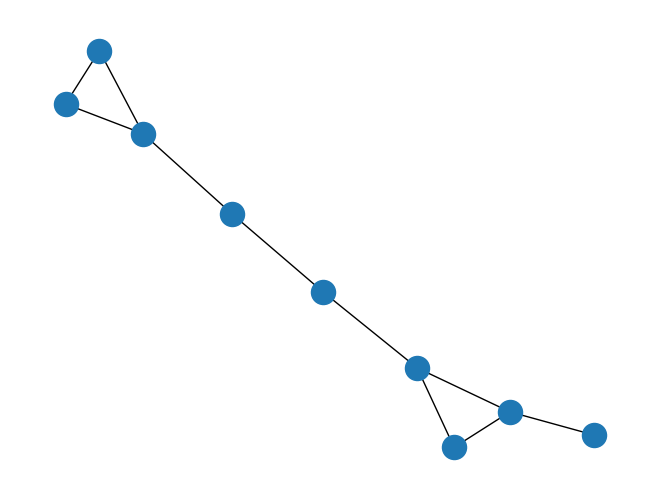

In [ ]:
nx.draw(G) #mengimplementasikan graph dalam gambar

In [ ]:
G.number_of_nodes() #mengecek jumlah node yang tersedia

9

##Menghitung Pagerank dengan Networkx

In [ ]:
# Menghitung nilai PageRank
pagerank = nx.pagerank(G, alpha=0.85)  # alpha adalah faktor damping, biasanya diatur ke 0.85

# Menampilkan hasil PageRank
for node, score in pagerank.items():
    print("Node:", node, "PageRank:", score)

Node: 1 PageRank: 0.05938835564547993
Node: 2 PageRank: 0.1507829866208175
Node: 3 PageRank: 0.10036774598960718
Node: 4 PageRank: 0.14463157826196532
Node: 5 PageRank: 0.10020561889330609
Node: 6 PageRank: 0.10013903498230511
Node: 7 PageRank: 0.1443032853634412
Node: 8 PageRank: 0.10009069712153876
Node: 9 PageRank: 0.10009069712153876


##Menghitung Pagerank Manual

In [ ]:
# Menghitung matriks adjacency dan out-degree dari graf
adj_matrix = nx.adjacency_matrix(G).toarray()
out_degree = np.sum(adj_matrix, axis=1)

# Menyusun matriks probabilitas transisi
prob_matrix = np.zeros(adj_matrix.shape)
for i in range(adj_matrix.shape[0]):
    for j in range(adj_matrix.shape[1]):
        if adj_matrix[i][j] == 1:
            prob_matrix[i][j] = 1 / out_degree[i]

# Inisialisasi nilai PageRank untuk setiap node
pagerank = np.full(adj_matrix.shape[0], 1 / adj_matrix.shape[0])

# Faktor damping
alpha = 0.85

# Jumlah iterasi untuk konvergensi
num_iterations = 100

# Algoritma PageRank
for _ in range(num_iterations):
    new_pagerank = (1 - alpha) + alpha * np.dot(prob_matrix.T, pagerank)
    pagerank = new_pagerank

# Menampilkan hasil PageRank
for i, node in enumerate(G.nodes()):
    print("Node:", node, "PageRank:", pagerank[i])

Node: 1 PageRank: 0.5344916611261628
Node: 2 PageRank: 1.3570294107347056
Node: 3 PageRank: 0.9033004704568232
Node: 4 PageRank: 1.3016781691034653
Node: 5 PageRank: 0.9018442788951414
Node: 6 PageRank: 0.9012599407366007
Node: 7 PageRank: 1.2987392918940648
Node: 8 PageRank: 0.9008280386195725
Node: 9 PageRank: 0.9008280386195725


##Implementasi Github

In [9]:
!pip install PyPDF2
!pip install docx2txt
import numpy as np
import PyPDF2
import docx2txt
import sys

# Pustaka numpy membantu bekerja dengan array: pembuatan dan manipulasi array
# implementasi ini menggunakan larik untuk menyimpan matriks yang dihasilkan sebagai larik 2-D
# PyPDF2 adalah perpustakaan yang digunakan untuk membaca file PDF
# docx2txt adalah library yang digunakan untuk membaca dokumen Word
# sys library telah digunakan untuk mencetak ukuran struktur data yang digunakan dalam program

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
# matplotlib adalah library yang digunakan untuk memvisualisasikan data dengan menggambar grafik input matriks
# kita akan menggunakannya untuk menggambar matriks yang dihasilkan nanti dalam program
# %matplotlib inline adalah perintah yang digunakan untuk menampilkan grafik di notebook jupyter

###Membaca Dokumen Dari User

In [13]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # Membaca tipe Dokumen
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

###Fungsi Mendapatkan Token Dokumen

In [14]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

###Membaca Dokumen

In [ ]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

###Menghasilkan daftar kalimat dalam dokumen

In [ ]:
# we want to tokenize the document for further processing
# tokenizing the sentence means that we are creating a list of all the sentences of the document.
# Need of tokenizing the document: Initially the document is in just a string format.
# if we want to process the document, we need to store it in a data structure.
# Tokenization of document into words is also possible, but we will go with the tokenizing with the sentences
# Since we want to choose the most relevant sentences, we need to generate tokens of sentences only
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

In [25]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

<class 'list'>
The size of the list "sentences" is: 0


In [26]:
for i in sentences_list:
    print(i)

###Hasilkan term-document matrix (TD matrix) dari data

In [ ]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [29]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'


# print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]


In [ ]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

# mencetak tipe cv_matrix
# dan bagaimana disimpan dalam memori?
# disimpan dalam format baris terkompresi
# format baris terkompresi:

In [ ]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

In [ ]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

In [ ]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

### Getting the rank of every sentence using textrank

In [ ]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

###Finding important sentences and generating summary

In [44]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [ ]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [ ]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

In [ ]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

In [ ]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [ ]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [ ]:
model = sentence_list

###Writing the summary to a new file

In [ ]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

In [ ]:
for lines in sentence_list:
    print(lines)